# Convolution Neural Networks (CNN)

###  Deep learning on images

Classify images into two categories(Ankur vs Priyanka) using CNN model and Keras library.

### Importing libraries and splitting the dataset

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import optimizers
from keras.layers import Activation, Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#%matplotlib.inline

Using TensorFlow backend.


In [2]:
# relative path to the train, test and validation data
train_path = 'data/train'
valid_path = 'data/valid'
test_path  = 'data/test'

In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# validation data should not be augmented
valid_datagen = ImageDataGenerator(rescale=1./255)

# validation and test datagen should be same
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# The input training images can be of any size and target_size parameter will resize the input images to 150x150
train_batches = train_datagen.flow_from_directory(train_path, target_size=(150,150), classes=['Ankur', 'Priyanka'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(150,150), classes=['Ankur', 'Priyanka'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(150,150), classes=['Ankur', 'Priyanka'], batch_size=60)

Found 479 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 133 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_batches:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 2)


In [6]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


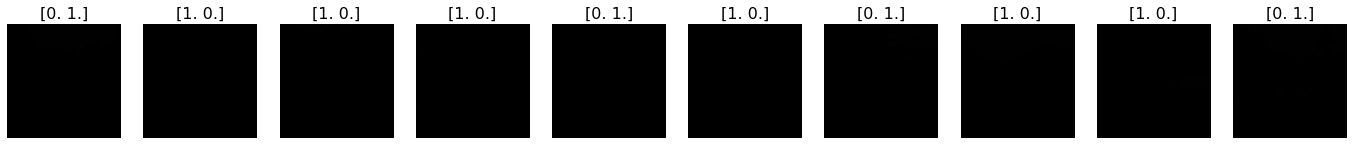

In [7]:
# Grab the batch of next images. In this case the batch_size is 10
imgs, labels = next(train_batches)
# Plot images from the training_set data
plots(imgs, titles=labels)

In [8]:
# Initialize the CNN
model = Sequential()

# Define a convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Define Maxpooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
# Flatten the images
model.add(Flatten())
# Full connection connects our convolution neural network to a neural network
# Dense layer with 512 nodes and 'relu' activation function.
model.add(Dense(512, activation='relu'))
# Output layer with 1 node and sigmoid as the activation function 
# We used sigmoid as we need to find the probability of the object being a Ankur or a Priyanka.
model.add(Dense(2, activation='sigmoid'))

# compiling the CNN
#model.compile(loss='binary_crossentropy' , optimizer='adam', 
#             metrics = ['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics = ['accuracy'])

# summary of the model
model.summary()

W0713 23:36:25.920367 140635217250112 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 23:36:25.937477 140635217250112 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 23:36:25.940282 140635217250112 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 23:36:25.955850 140635217250112 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
type(model)

keras.engine.sequential.Sequential

### Training our model

In [10]:
# model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

# By default, shuffle is True and it tells that the order of data your model is iterating with each run/epoch 
# will be different.
model.fit_generator(train_batches, steps_per_epoch=5, validation_data=valid_batches, shuffle=True, 
                    validation_steps=4, epochs=10, verbose=2)

W0713 23:36:37.804062 140635217250112 deprecation.py:323] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 23:36:37.898863 140635217250112 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
 - 19s - loss: 0.6960 - acc: 0.5400 - val_loss: 0.6907 - val_acc: 0.3750
Epoch 2/10
 - 19s - loss: 0.6989 - acc: 0.4400 - val_loss: 5.9694 - val_acc: 0.4000
Epoch 3/10
 - 17s - loss: 0.7673 - acc: 0.4400 - val_loss: 0.7602 - val_acc: 0.5250
Epoch 4/10
 - 21s - loss: 0.6863 - acc: 0.5400 - val_loss: 0.6870 - val_acc: 0.5750
Epoch 5/10
 - 19s - loss: 0.6840 - acc: 0.6200 - val_loss: 0.6300 - val_acc: 0.4750
Epoch 6/10
 - 17s - loss: 0.6586 - acc: 0.7200 - val_loss: 5.1428 - val_acc: 0.5750
Epoch 7/10
 - 16s - loss: 0.6821 - acc: 0.5600 - val_loss: 4.9954 - val_acc: 0.5750
Epoch 8/10
 - 17s - loss: 0.6881 - acc: 0.5600 - val_loss: 7.0822 - val_acc: 0.5250
Epoch 9/10
 - 16s - loss: 0.6735 - acc: 0.5600 - val_loss: 6.4212 - val_acc: 0.5750
Epoch 10/10
 - 16s - loss: 0.6430 - acc: 0.6551 - val_loss: nan - val_acc: 0.5000


## Visualizing every channel in every intermediate activation

In [18]:
import os.path
from os import path

# Preprocessing a single image, which is not part of the images the network was trained on
test_path  = 'data/test'
img_path = os.path.join(os.path.join(test_path, 'Ankur'), 'DSC08109.JPG')

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Note that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


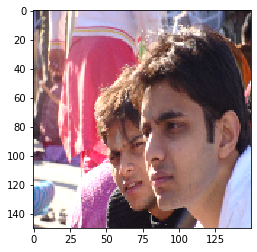

In [19]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [20]:
from keras import models

# Extracts the output of top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]] 
print(layer_outputs)

# creates a model that will return these outputs, given the input model
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

# It's a 148x148 feature map with 32 channels
first_layer_activation = activations[0]
print(first_layer_activation.shape)

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>, <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 15, 15, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]
(1, 148, 148, 32)


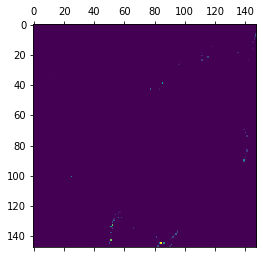

In [21]:
# visualize the 3rd channel:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

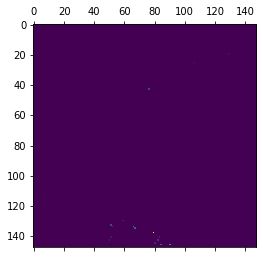

In [22]:
# visualize 20th channel
plt.matshow(first_layer_activation[0, :, :, 20], cmap='viridis')
plt.show()

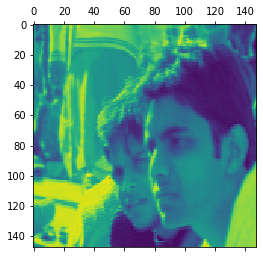

In [23]:
# visualize 30th channel
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


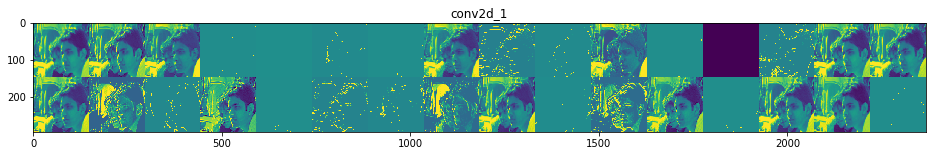

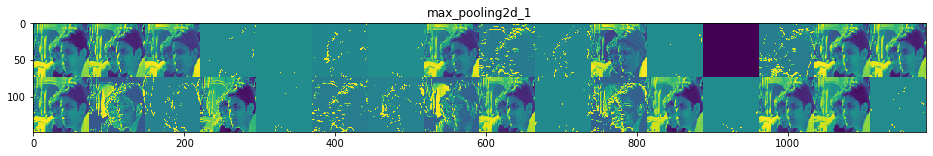

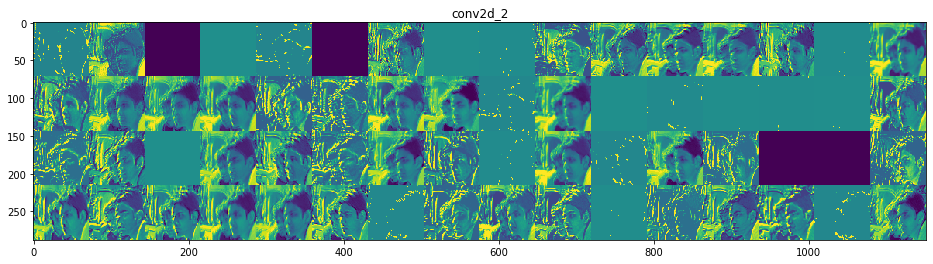

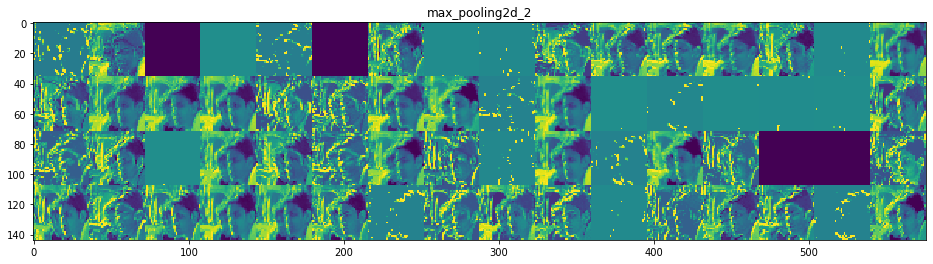

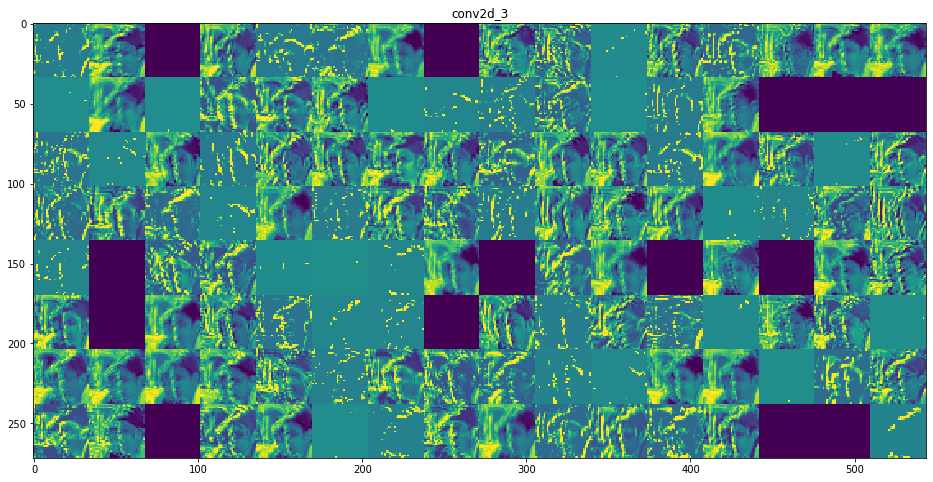

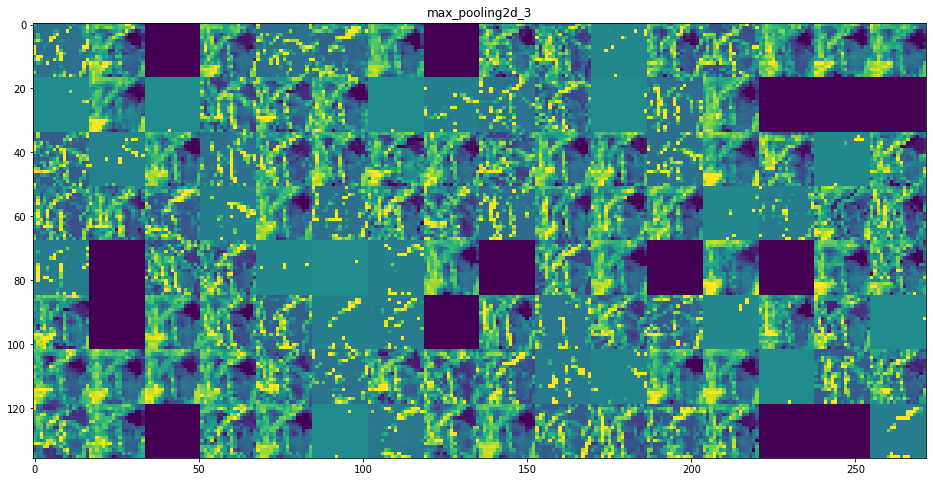

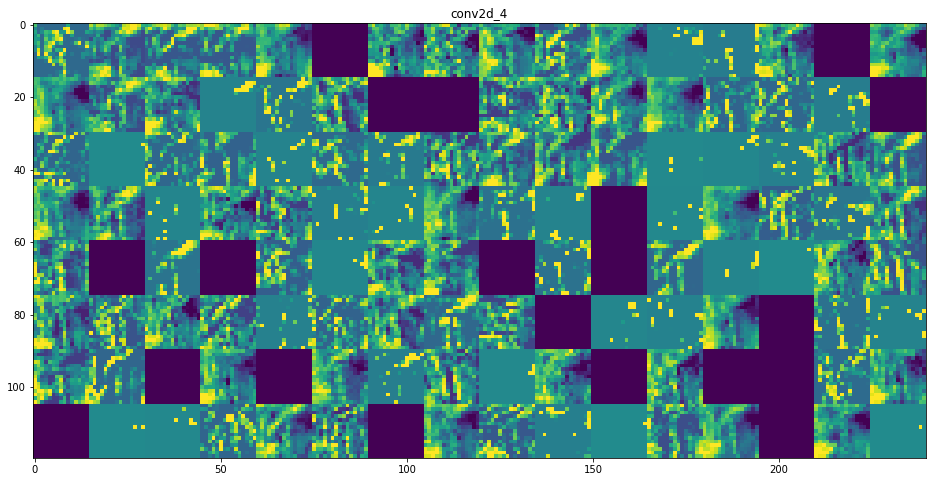

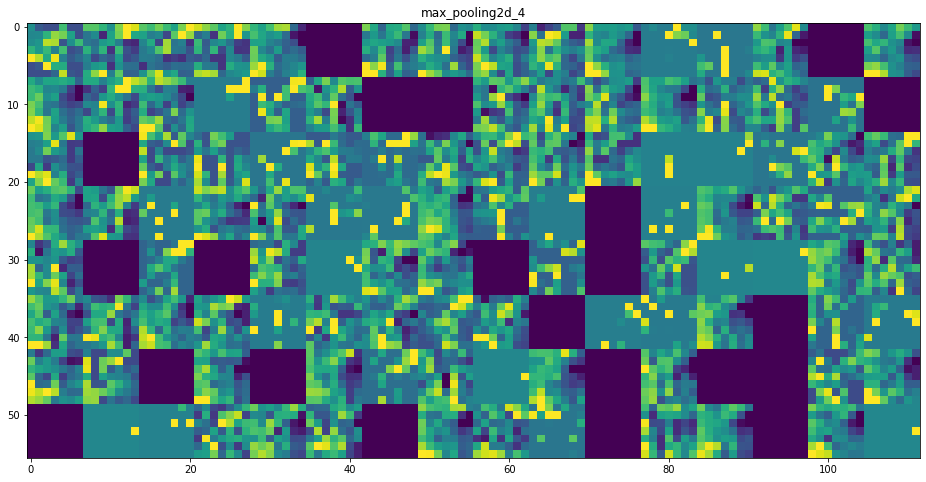

In [24]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

## Predictions

In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


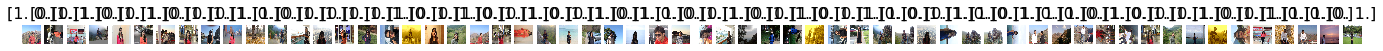

In [26]:
# Ankur's images are labeles as (1,0) and Priyanka's images are labeled as (0,1)
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [27]:
# Ankur's images will be labeled as 1 instead of (1,0) 
# and Priyanka's imges will be labeled as 0 instead of (0,1)
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [28]:
# predictions = model.predict(train_batches, batch_size=10, verbose=0)

# If there are 72 test images in total and the batch_size is 10 then steps = 72/10 = 7.2
# Alternatively, if there are 60 test images and the batch_size is 10 then steps=1
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [29]:
predictions

array([[0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [9.9999964e-01, 0.0000000e+00],
       [9.9999988e-01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [6.7445087e-01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [9.9993294e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.8155541e-01, 0.0000000e+00],
       [9.9966824e-01, 0.0000000e+00],
       [9.9999964e-01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [8.4635538e-01, 0.0000000e+00],
       [9.9997723e-01, 0.0000000e+00],
       [1.0000000e+00, 0.

In [30]:
# Mapping keras labels to image classes
test_batches.class_indices

{'Ankur': 0, 'Priyanka': 1}

In [31]:
#rounded_predictions = model.predict_classes(train_batches, batch_size=10, verbose=0)
#for i in rounded_predictions:
#    print(i)

## Confusion Matrix
    

In [32]:
from sklearn.metrics import confusion_matrix
import itertools

In [33]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4 31]
 [ 9 16]]


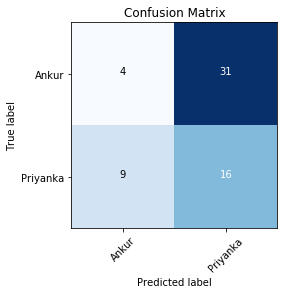

In [35]:
cm_plots_labels = ['Ankur', 'Priyanka']
plot_confusion_matrix(cm, cm_plots_labels, title='Confusion Matrix')